## We will use SGD to learn y = ax + b . 

#### If we can solve something with 2 parameters, we can use the same technique to solve 100 million parameters.

In [1]:
%matplotlib inline
from fastai.learner import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Here we generate some fake data
def lin(a,b,x): return a*x+b

In [3]:
def gen_fake_data(n, a, b):
    x = s = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y

x, y = gen_fake_data(50, 3., 8.)

In [4]:
?? np.random.normal

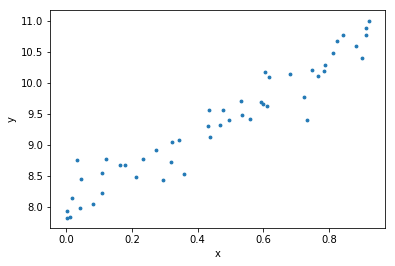

In [5]:
plt.scatter(x,y, s=8); 
plt.xlabel("x"); 
plt.ylabel("y");

To get started, we need a loss function. This is a regression problem since the output is continuous output, and the most common loss function is the mean squared error (MSE).

Regression — the target output is a real number or a whole vector of real numbers
Classification — the target output is a class label

In [6]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

def mse_loss(a, b, x, y): return mse(lin(a,b,x), y)

You want to find parameters (weights) $a$ and $b$ such that you minimize the error between the points and the line $a\cdot x + b$. Note that here $a$ and $b$ are unknown. For a regression problem the most common error function or loss function is the mean squared error.

In [7]:
y_hat = lin(10,5,x)
mse(y_hat, y)

4.489169371120628

In [8]:
mse_loss(10, 5, x, y)

4.489169371120628

For a fixed dataset $x$ and $y$ mse_loss(a,b) is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

In [9]:
# generate some more data
x, y = gen_fake_data(10000, 3., 8.)
x.shape, y.shape

((10000,), (10000,))

In [10]:
x,y = V(x),V(y)

In [11]:
??V

In [12]:
??map_over

We create random weight for a and b , they are the variables we want to learn, so set requires_grad=True .

In [13]:
# Create random weights a and b, and wrap them in Variables.
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)
a,b

(Variable containing:
 -0.7384
 [torch.cuda.FloatTensor of size 1 (GPU 0)], Variable containing:
  1.7942
 [torch.cuda.FloatTensor of size 1 (GPU 0)])

### Steps

calculate the loss (remember, a and b are set to random initially)

from time to time (every 1000 epochs), print out the loss

loss.backward() will calculate gradients for all variables with requires_grad=True and fill in .grad property

update a to whatever it was minus LR * grad ( .data accesses a tensor inside of a variable)

when there are multiple loss functions or many output layers contributing to the gradient, PyTorch will add them together. So 
you need to tell when to set gradients back to zero (zero_() in the _ means that the variable is changed in-place).


In [14]:
learning_rate = 1e-3
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.data[0])
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Zero the gradients
    a.grad.data.zero_()
    b.grad.data.zero_()

66.66792297363281
0.5059145092964172
0.09678831696510315
0.09320157766342163
0.09236057102680206
0.09173019975423813
0.09124571830034256
0.09087390452623367
0.0905882716178894
0.09036910533905029


### Gradient descent with numpy

In [15]:
from matplotlib import rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3

In [16]:
x, y = gen_fake_data(50, 3., 8.)

In [29]:
a_guess,b_guess = -1., 1.
mse_loss(a_guess, b_guess, x, y)

78.52505226543363

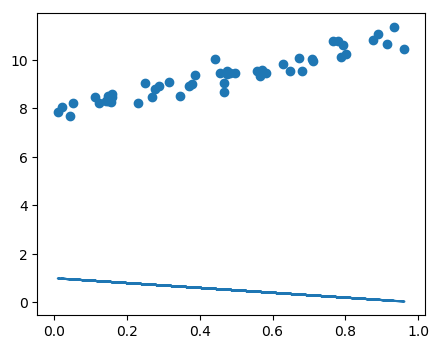

In [30]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
#plt.close()

In [31]:
lr=0.01
print(mse_loss(a_guess, b_guess, x, y))
def upd(i):
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()
    if i % 100 ==0 :
        fig = plt.figure(dpi=100, figsize=(5, 4))
        plt.scatter(x,y)
        line, = plt.plot(x,lin(a_guess,b_guess,x))
        print(mse_loss(a_guess, b_guess, x, y))

78.52505226543363


74.73046324335927
0.628917666292868
0.10412625575831212
0.09635497389786085
0.09308879247830638
0.09054487827836159
0.08854817572059046
0.08698086782562826
0.08575061169885168
0.08478492387791486


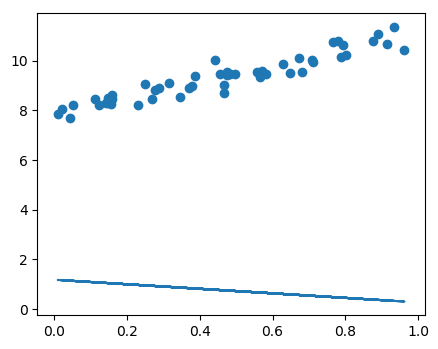

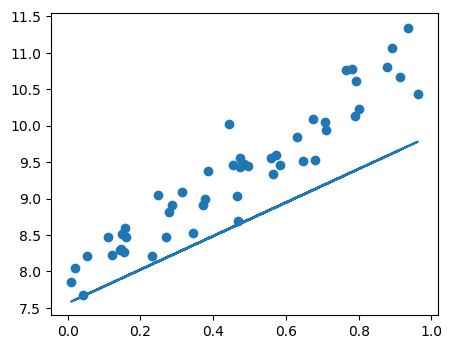

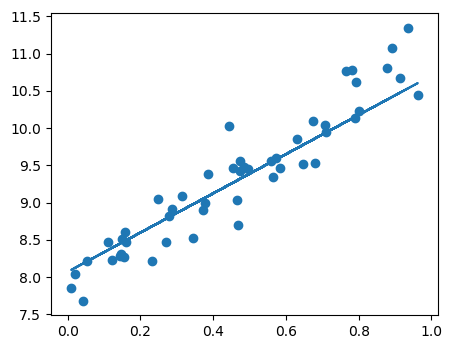

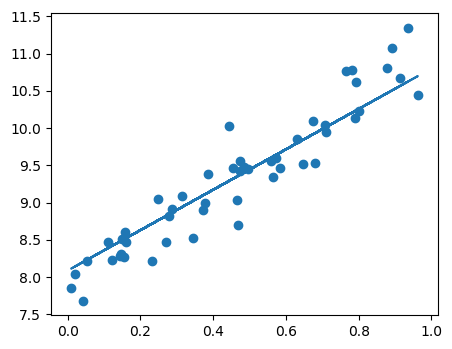

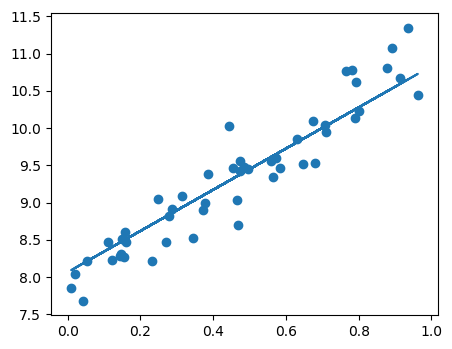

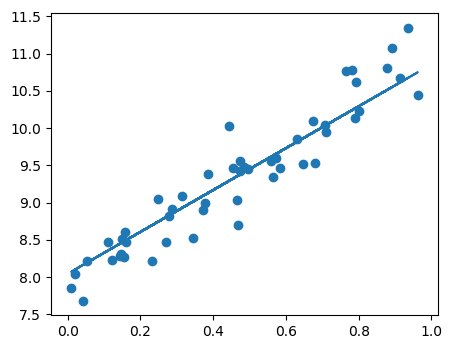

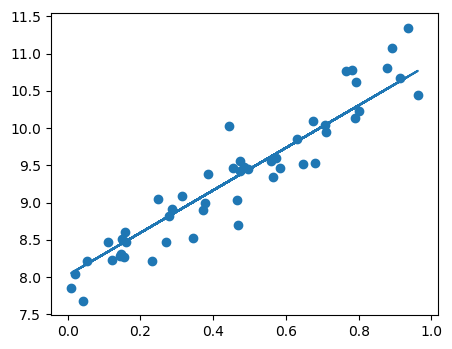

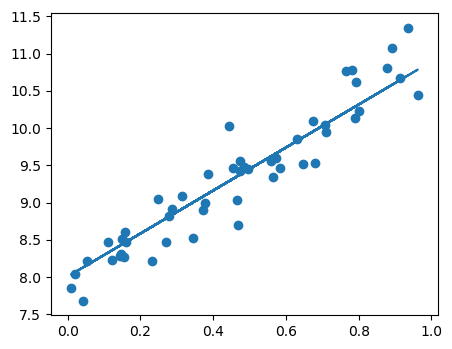

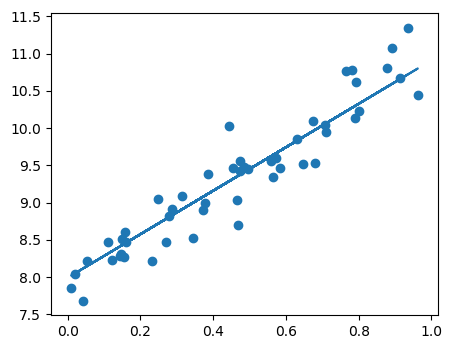

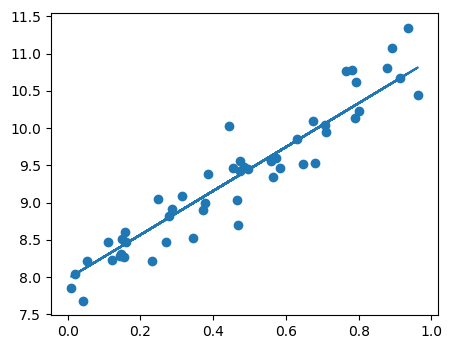

In [32]:
for i in range(1000): upd(i)

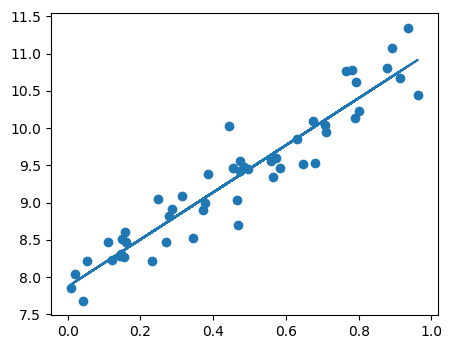

In [21]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))